In [1]:
import json
import os


# Configure warning behavior
import warnings
warnings.filterwarnings("ignore")

# Import matplotlib and use `%matplotlib` magic command
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 5000)

In [2]:
CREATE_TREE = "totalTreeCreationTime"
SKYLINE = "totalSkylineTime"
TOPK = "totalTopKTime"
SKY_TOPK_S1 = "totalSkyTopKTime_Sol1"
SKY_TOPK_S2 = "totalSkyTopKTime_Sol2"

N_DIMS = "nDims"
N_PARTS = "nPartitions"

DATA_SIZE = "dataSize"
DISTRO = "distribution"
IOs = "totalTreeCreationIOs"
OVERFLOW = "totalNOverflow"

UNIFORM = "uniform"
NORMAL = "normal"
CORR = "correlated"
ANTICORR = "anticorrelated"
DISTRIBUTIONS = [UNIFORM, NORMAL, CORR, ANTICORR]
DATASIZE = [5000, 50000, 100000]
PARTITIONS = [2, 3, 4, 5, 6, 8]
DIMENSIONS = [2, 3, 4, 5]

In [3]:
def create_results_dict():
    root_dir = os.path.join("C:\\Users\\karal\\progr\\Scala\\BigDataSpark\\RStarTreeScala\\Results")
    json_dict = {}

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as json_file:
                    try:
                        json_data = json.load(json_file)
                        key = file_path[file_path.find("iter"):]
                        iteration = key[4:key.find("\\")]
                        json_data["iter"] = iteration
                        json_dict[key] = json_data
                    except json.JSONDecodeError as e:
                        print(f"Error decoding JSON in file {file_path}: {e}")

    return json_dict

In [4]:
results = create_results_dict()

In [ ]:
# results

In [7]:
df3 = []
for experiment_file, experiment_results in results.items():
    df3.append({ **{"file" : experiment_file} ,
                 **experiment_results })
df3 = pd.DataFrame(df3)
df3.drop(['file'], axis=1, inplace=True)
df3.head(15)

distribution  dataSize  nDims  nPartitions  totalTreeCreationTime  totalTreeCreationIOs  totalNOverflow  totalSkylineTime  aggrSkylineTime  kForDataset  totalTopKTime  aggrTopKTime  kForSkyline  totalSkyTopKTime_Sol1  aggrSkyTopKTime  totalSkyTopKTime_Sol2 iter
0   anticorrelated_100k_2D    100000      2            2             131.211409                624321             853          5.449390         0.025822           10      10.287615      0.184021           10               7.886553         0.130385               0.623092    1
1   anticorrelated_100k_2D    100000      2            3              62.441994                523763             870          4.825142         0.037424           10       5.383503      0.221051           10               6.609000         0.111318               0.423170    1
2   anticorrelated_100k_2D    100000      2            4              37.178695                484484             842          5.914430         0.022796           10       6.244975      0.287150           10               6.820192         0.102375               0.318388    1
3   anticorrelated_100k_2D    100000      2            6              29.753165                501816             893          3.880024         0.033871           10       3.728805      0.429932           10               4.707157         0.097781               0.306671    1
4   anticorrelated_100k_2D    100000      2            8              14.359381                504646             907          1.716369         0.059361           10       2.507535      0.590278           10               2.949413         0.116713               0.308751    1
5   anticorrelated_100k_3D    100000      3            2             152.415498                833607            1474         13.775488         0.609421           10      21.714786      0.243191           10              30.277277         0.224740               7.516275    1
6   anticorrelated_100k_3D    100000      3            3              54.469439                762094            1465          2.900476         0.599837           10       7.405951      0.351140           10              10.728254         0.257795               5.145417    1
7   anticorrelated_100k_3D    100000      3            4              37.171552                715624            1503          5.517537         0.897213           10       9.219961      0.418474           10              11.741321         0.292694               4.648623    1
8   anticorrelated_100k_3D    100000      3            6              22.496690                552578            1431          6.011074         1.398394           10       6.290435      0.602326           10               8.111358         0.357484               3.880391    1
9   anticorrelated_100k_3D    100000      3            8              26.695732                537787            1394          4.154009         1.728703           10       4.508120      0.655258           10               6.169764         0.367891               3.998759    1
10  anticorrelated_100k_4D    100000      4            2             172.701259                744624            1474         12.596513         4.053153           10      19.550571      0.334317           10              41.111579         0.309358              62.092210    1
11  anticorrelated_100k_4D    100000      4            3              72.694552                733773            1580         13.484307         5.104114           10      16.563784      0.455834           10              26.772100         0.429805              49.692185    1
12  anticorrelated_100k_4D    100000      4            4              32.817270                663879            1369          9.228639         7.008130           10      11.678278      0.525819           10              14.952612         0.449364              40.234735    1
13  anticorrelated_100k_4D    100000      4            6              28.848747                663014            1632         14.614273        11.4854

In [8]:
df3.sort_values(by = [DATA_SIZE, DISTRO, N_DIMS, N_PARTS, "iter"], inplace=True)
df3.head(15)

distribution  dataSize  nDims  nPartitions  totalTreeCreationTime  totalTreeCreationIOs  totalNOverflow  totalSkylineTime  aggrSkylineTime  kForDataset  totalTopKTime  aggrTopKTime  kForSkyline  totalSkyTopKTime_Sol1  aggrSkyTopKTime  totalSkyTopKTime_Sol2 iter
160  anticorrelated_5k_2D      5000      2            2               1.554420                 23821              43          0.253342         0.005568           10       0.292088      0.076524           10               0.326788         0.026067               0.041529    1
399  anticorrelated_5k_2D      5000      2            2               1.539008                 23821              43          0.270903         0.006994           10       0.368285      0.119292           10               0.332888         0.023478               0.041584    2
639  anticorrelated_5k_2D      5000      2            2               1.540591                 23821              43          0.291038         0.039990           10       0.278531      0.058590           10               0.336989         0.028603               0.044294    3
161  anticorrelated_5k_2D      5000      2            3               1.199289                 24483              45          0.249499         0.033187           10       0.243740      0.059046           10               0.275944         0.039206               0.037767    1
400  anticorrelated_5k_2D      5000      2            3               1.184129                 24483              45          0.292744         0.017437           10       0.397110      0.083636           10               0.330947         0.026382               0.042635    2
640  anticorrelated_5k_2D      5000      2            3               1.190293                 24483              45          0.254322         0.012944           10       0.273686      0.064303           10               0.292547         0.029248               0.046351    3
162  anticorrelated_5k_2D      5000      2            4               0.733492                 16964              26          0.166182         0.045224           10       0.126077      0.057499           10               0.168383         0.027436               0.039268    1
401  anticorrelated_5k_2D      5000      2            4               0.760187                 16964              26          0.159751         0.041234           10       0.147074      0.079634           10               0.156717         0.030583               0.034256    2
641  anticorrelated_5k_2D      5000      2            4               0.760461                 16964              26          0.181754         0.052691           10       0.162451      0.082850           10               0.175086         0.028027               0.037588    3
163  anticorrelated_5k_2D      5000      2            6               0.700287                 13092              20          0.188871         0.037673           10       0.133912      0.078842           10               0.153637         0.029250               0.037766    1
402  anticorrelated_5k_2D      5000      2            6               0.661227                 13092              20          0.214397         0.050403           10       0.162065      0.070662           10               0.183802         0.031177               0.042853    2
642  anticorrelated_5k_2D      5000      2            6               0.706259                 13092              20          0.268833         0.058757           10       0.215421      0.096273           10               0.225702         0.040366               0.036456    3
164  anticorrelated_5k_2D      5000      2            8               0.455777                  8464               8          0.075431         0.026250           10       0.201571      0.159611           10               0.084337         0.031665               0.040468    1
403  anticorrelated_5k_2D      5000      2            8               0.459346                  8464               8          0.118787         0.049432           1

In [9]:
df = df3.groupby(['distribution', 'dataSize', 'nDims', 'nPartitions', 'kForDataset'])

df = df.agg({
    'totalTreeCreationTime': 'mean',
    'totalTreeCreationIOs': 'mean',
    'totalNOverflow': 'mean',
    'totalSkylineTime': 'mean',
    'aggrSkylineTime': 'mean',
    'totalTopKTime': 'mean',
    'aggrTopKTime': 'mean',
    'totalSkyTopKTime_Sol1': 'mean',
    'aggrSkyTopKTime': 'mean',
    'totalSkyTopKTime_Sol2': 'mean',
})

df = df.reset_index()
df.sort_values(by = [DATA_SIZE, DISTRO, N_DIMS, N_PARTS], inplace=True)
df['distribution'] = df['distribution'].str.extract(r'(\w+)_\d+k_\d+D')
df['distribution'] = pd.Categorical(df['distribution'], categories=DISTRIBUTIONS, ordered=True)
df.head(15)

distribution  dataSize  nDims  nPartitions  kForDataset  totalTreeCreationTime  totalTreeCreationIOs  totalNOverflow  totalSkylineTime  aggrSkylineTime  totalTopKTime  aggrTopKTime  totalSkyTopKTime_Sol1  aggrSkyTopKTime  totalSkyTopKTime_Sol2
40  anticorrelated      5000      2            2           10               1.544673               23821.0            43.0          0.271761         0.017518       0.312968      0.084802               0.332221         0.026049               0.042469
41  anticorrelated      5000      2            3           10               1.191237               24483.0            45.0          0.265522         0.021189       0.304845      0.068995               0.299813         0.031612               0.042251
42  anticorrelated      5000      2            4           10               0.751380               16964.0            26.0          0.169229         0.046383       0.145201      0.073328               0.166729         0.028682               0.037037
43  anticorrelated      5000      2            6           10               0.689258               13092.0            20.0          0.224034         0.048945       0.170466      0.081926               0.187714         0.033598               0.039025
44  anticorrelated      5000      2            8           10               0.475771                8464.0             8.0          0.099632         0.033707       0.169051      0.120541               0.113455         0.030024               0.039544
45  anticorrelated      5000      3            2           10               1.348419               22345.0            55.0          0.156660         0.100995       0.153519      0.080649               0.185345         0.030136               0.249043
46  anticorrelated      5000      3            3           10               1.001681               20433.0            48.0          0.370834         0.251377       0.165585      0.091855               0.192790         0.035352               0.213139
47  anticorrelated      5000      3            4           10               0.915445               21710.0            60.0          0.372996         0.257517       0.161769      0.084986               0.161323         0.038210               0.190290
48  anticorrelated      5000      3            6           10               0.689537               16290.0            36.0          0.490964         0.327517       0.173880      0.098132               0.188769         0.046820               0.185276
49  anticorrelated      5000      3            8           10               0.694501               17248.0            50.0          0.647895         0.489595       0.201397      0.114594               0.195667         0.051161               0.186467
50  anticorrelated      5000      4            2           10               1.440384               22251.0            69.0          0.668367         0.584329       0.249629      0.100719               0.244090         0.036670               1.073270
51  anticorrelated      5000      4            3           10               1.039972               20334.0            58.0          0.871715         0.738561       0.186638      0.107351               0.196720         0.041950               0.821186
52  anticorrelated      5000      4            4           10               0.934627               20091.0            61.0          1.078441         0.910574       0.181737      0.090139               0.217511         0.046650               0.698080
53  anticorrelated      5000      4            6           10               0.682541               15426.0            34.0          1.300444         1.172954       0.154013      0.112998               0.185092         0.070010               0.665098
54  anticorrelated      5000      4            8           10               0.669154               15564.0            44.0          1.238357         1.116913       0.162148      0.132221               0.174491         0.068412               0.630258

In [10]:
def getDatasetResults(distribution, datasize): 
    datasetResults = df[(df[DISTRO] == distribution) & (df[DATA_SIZE] == datasize)]
    return datasetResults

In [11]:

def make_plots_dont_sharex(timer_):
    # Create a grid of subplots
    fig, axs = plt.subplots(len(DATASIZE), len(DISTRIBUTIONS), figsize=(15, 10), sharex=True)

    # Iterate over all combinations of datasize and distribution
    for i, datasize in enumerate(DATASIZE):
        for j, distribution in enumerate(DISTRIBUTIONS):
            results_group_ = getDatasetResults(distribution, datasize)
            df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

            # df = df[df['nDims'].isin([2])]

            # Plotting in the corresponding subplot
            for key, group in df_.groupby(N_DIMS):
                axs[i, j].plot(group[N_PARTS], group[timer_], marker='o', label=f'nDims = {key}')

            axs[i, j].set_xlabel('Number of Partitions')
            axs[i, j].set_ylabel(timer_)
            axs[i, j].set_title(f'Datasize: {datasize}, Distribution: {distribution}')
            axs[i, j].legend(title='Number of Dimensions')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()


def make_plots_sharex(timer_):
    # Create a grid of subplots
    fig, axs = plt.subplots(len(DATASIZE), len(DISTRIBUTIONS), figsize=(15, 10), sharex=True)

    # Iterate over all combinations of datasize and distribution
    for i, datasize in enumerate(DATASIZE):
        # Use sharey=True for the first subplot in each row, and False for the rest
        sharey_flag = True
        for j, distribution in enumerate(DISTRIBUTIONS):
            results_group_ = getDatasetResults(distribution, datasize)
            df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

            # df = df[df['nDims'].isin([2])]

            # Plotting in the corresponding subplot
            for key, group in df_.groupby(N_DIMS):
                axs[i, j].plot(group[N_PARTS], group[timer_], marker='o', label=f'nDims = {key}')

            axs[i, j].set_xlabel('Number of Partitions')
            axs[i, j].set_ylabel(timer_)
            axs[i, j].set_title(f'Datasize: {datasize}, Distribution: {distribution}')
            axs[i, j].legend(title='Number of Dimensions')

            # Share y-axis only for the first subplot in each row
            axs[i, j].get_shared_y_axes().join(axs[i, 0])
            axs[i, j].sharey(axs[i, 0])

            # Set sharey_flag to False after the first subplot in each row
            sharey_flag = False

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()
    
def make_plots(timer_, sharex):
    if sharex:
        make_plots_sharex(timer_)
    else:
        make_plots_dont_sharex(timer_)

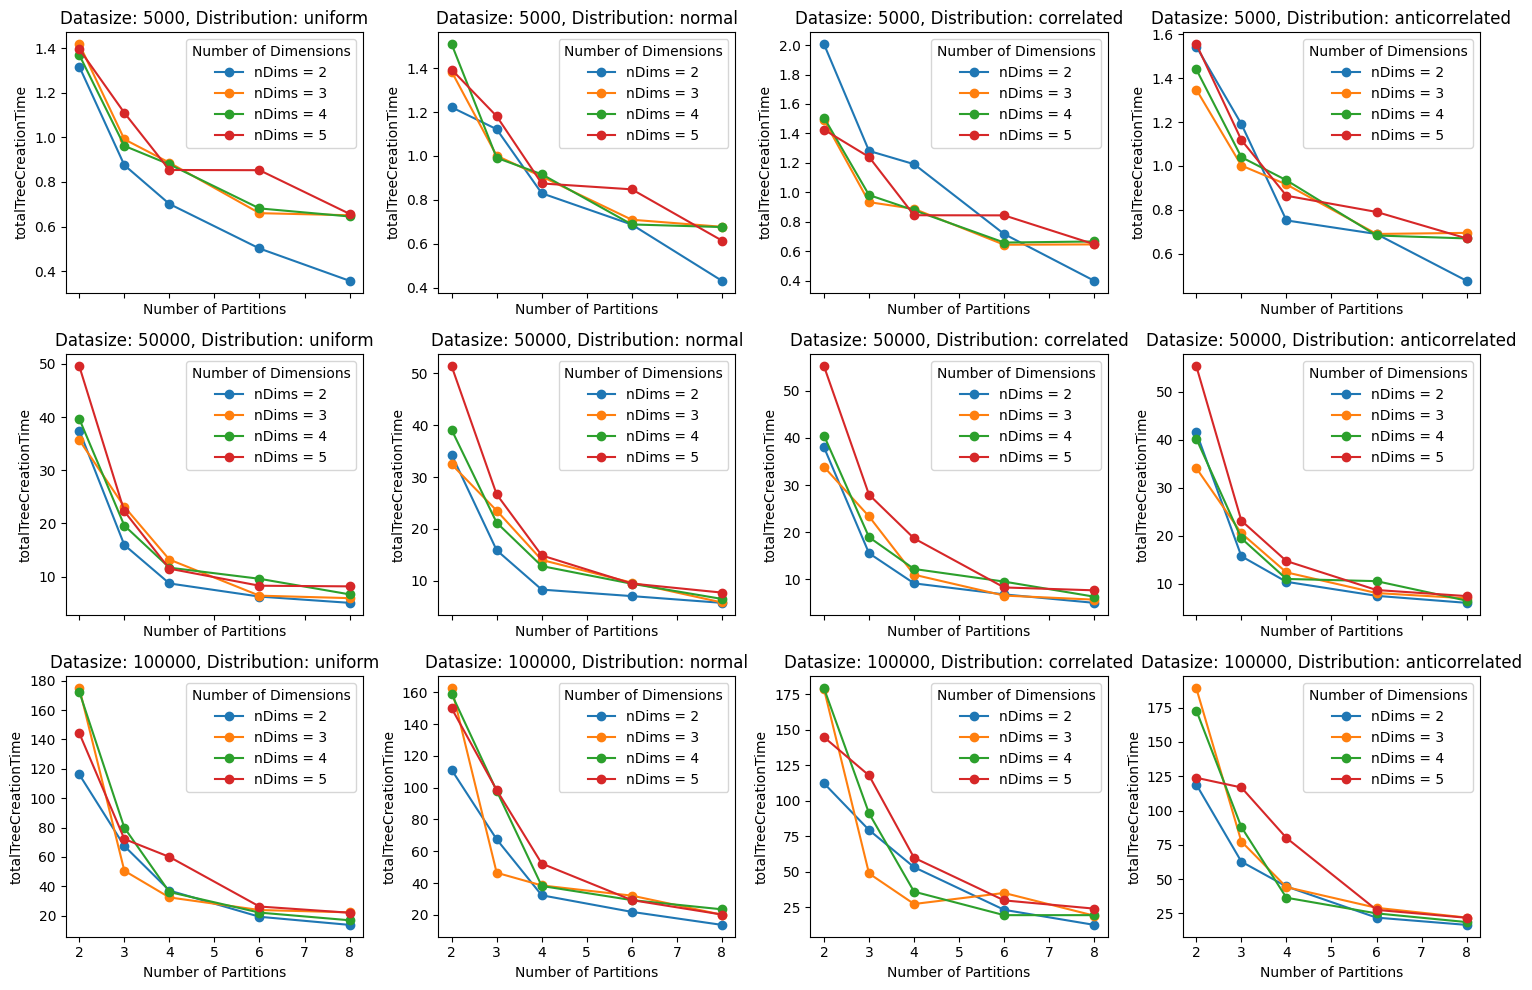

In [12]:
make_plots(CREATE_TREE, False)

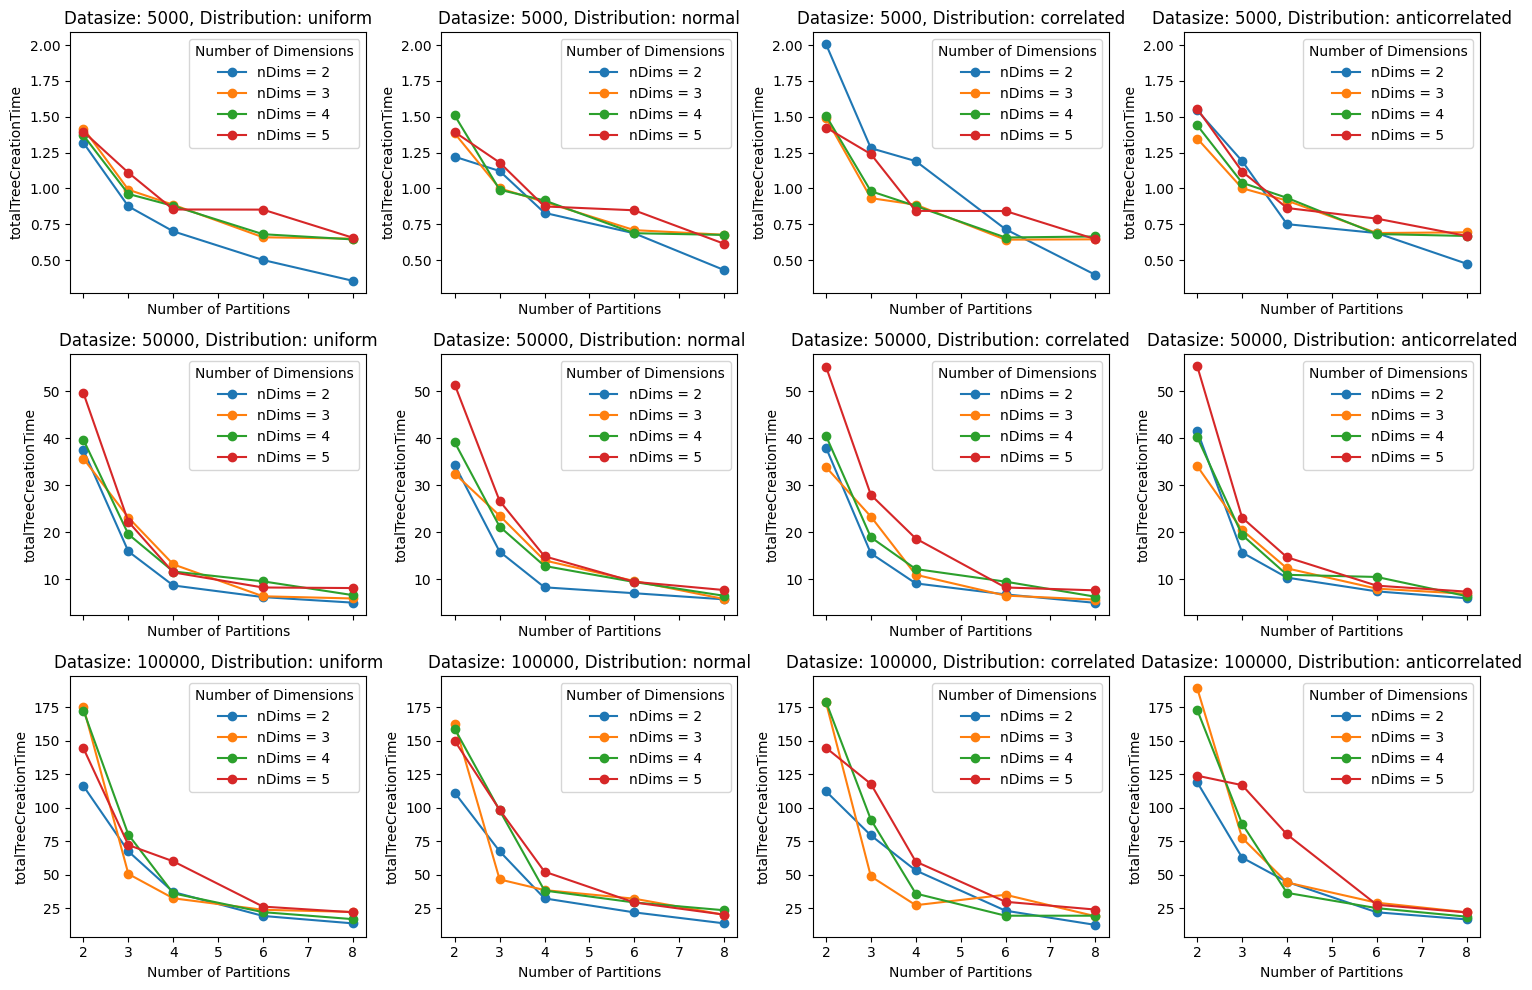

In [13]:
make_plots(CREATE_TREE, True)

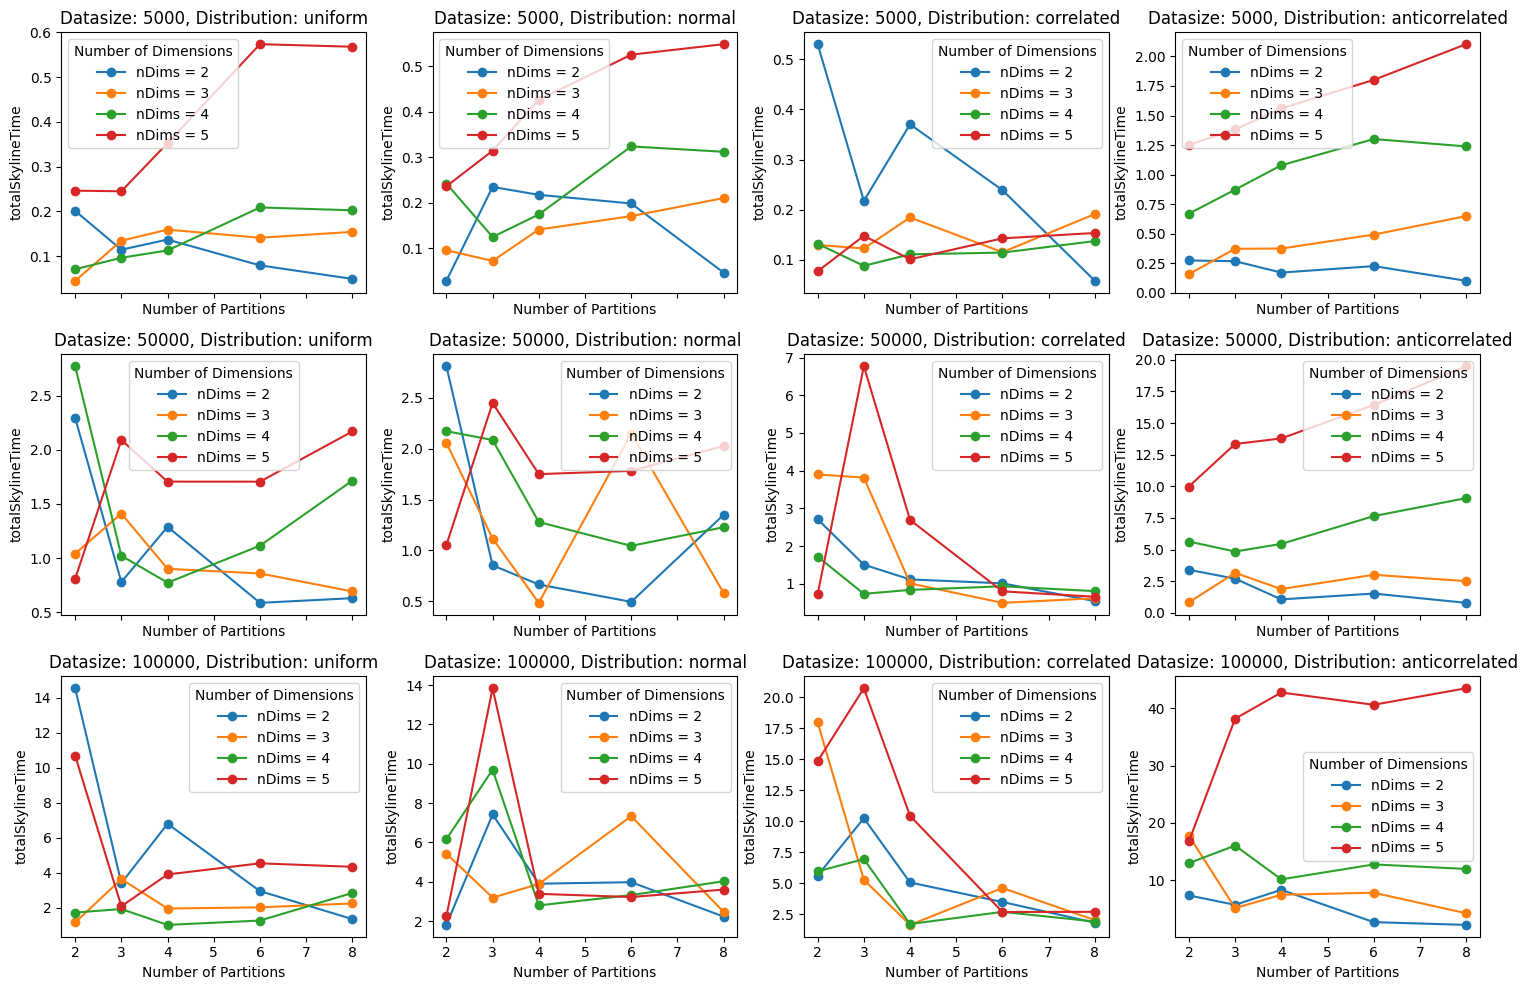

In [14]:
make_plots(SKYLINE, False)

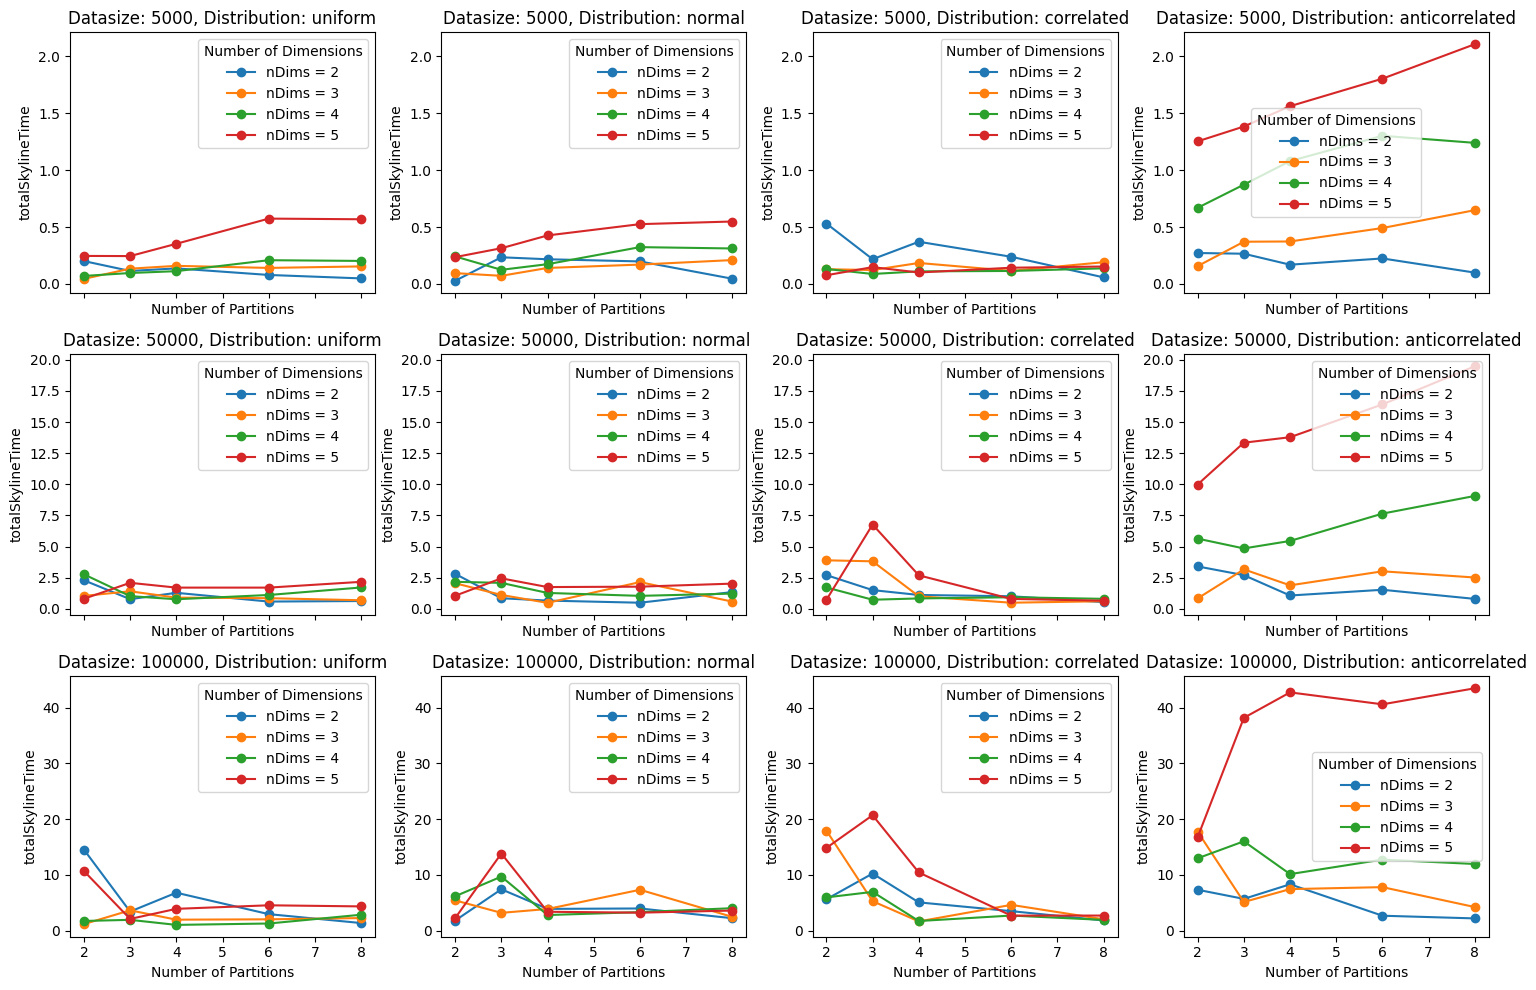

In [15]:
make_plots(SKYLINE, True)

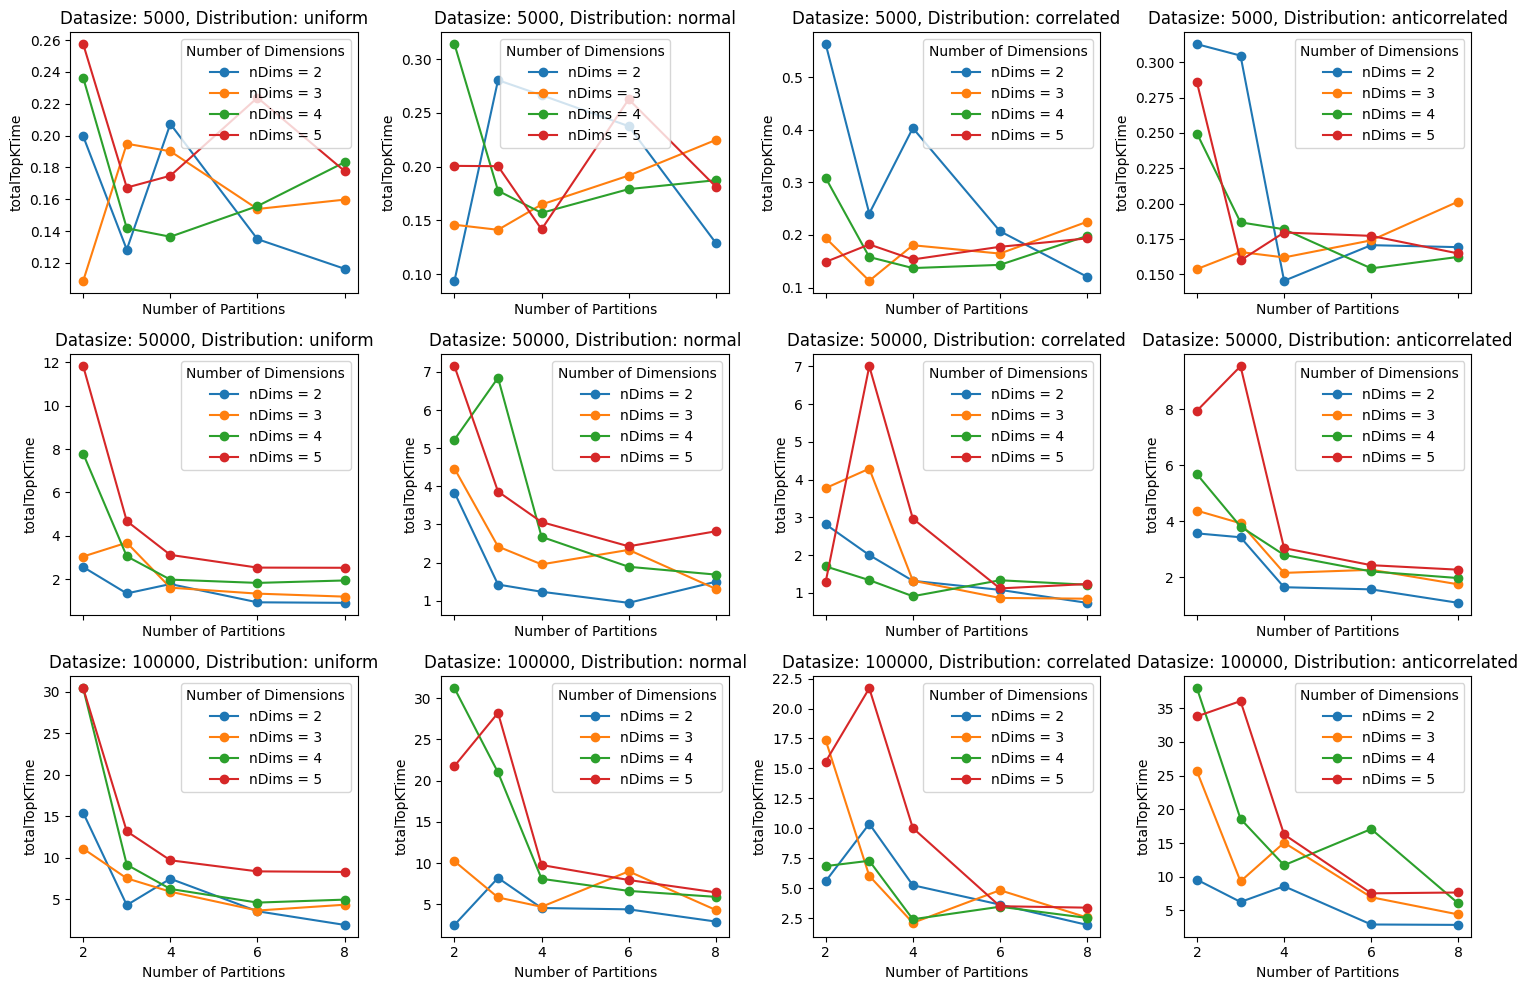

In [16]:
make_plots(TOPK, False)

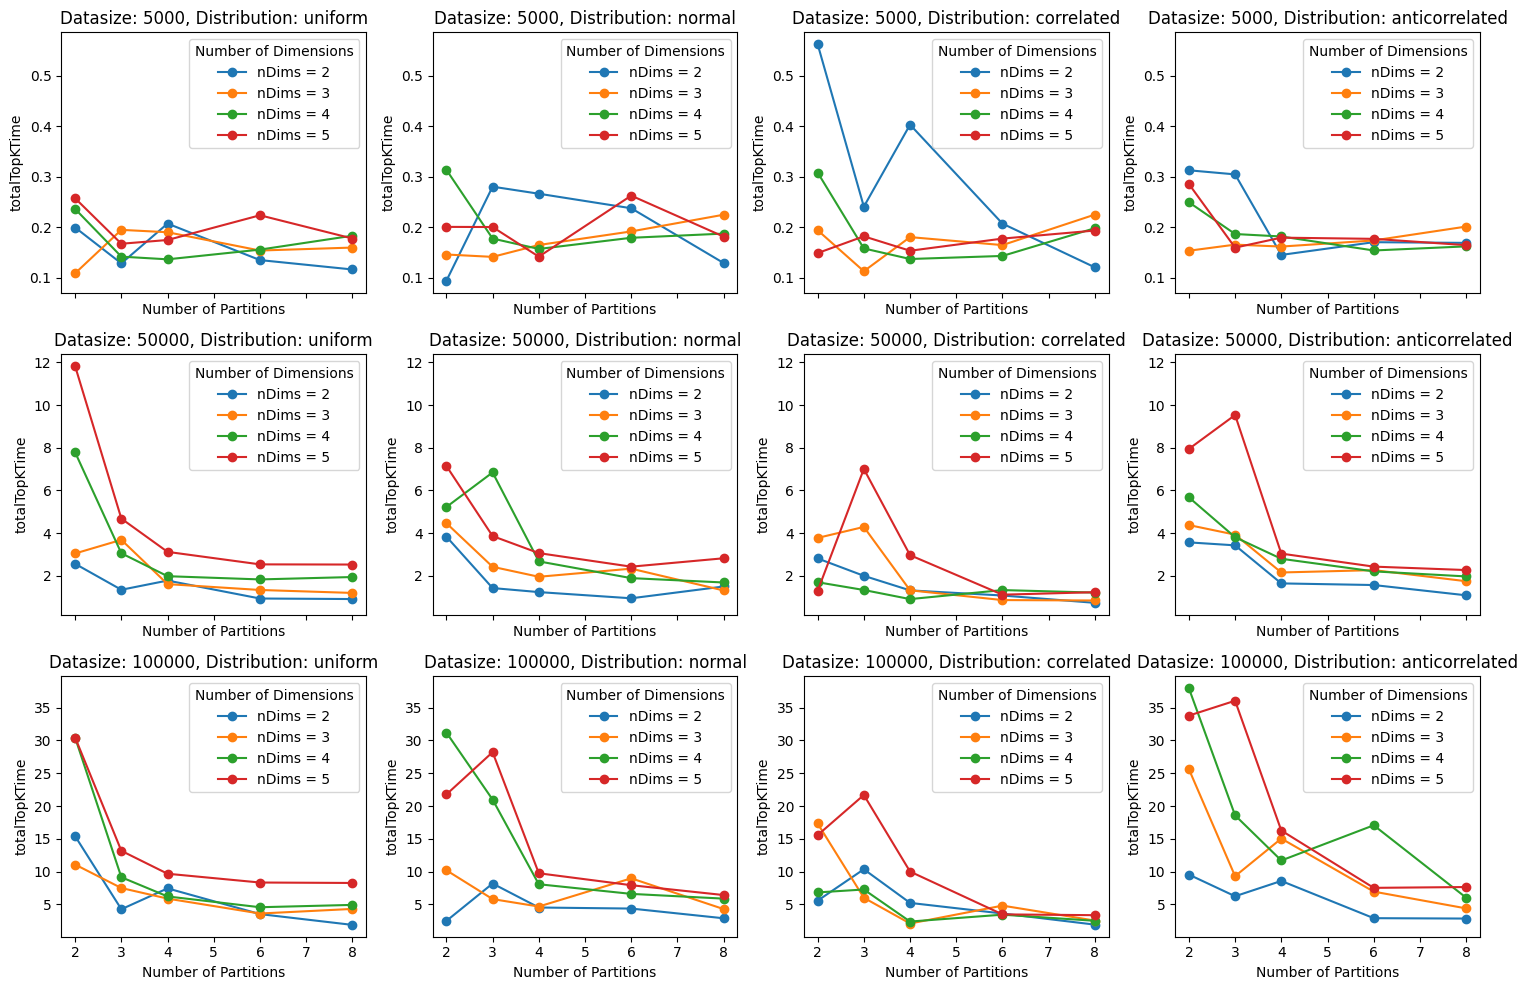

In [17]:
make_plots(TOPK, True)

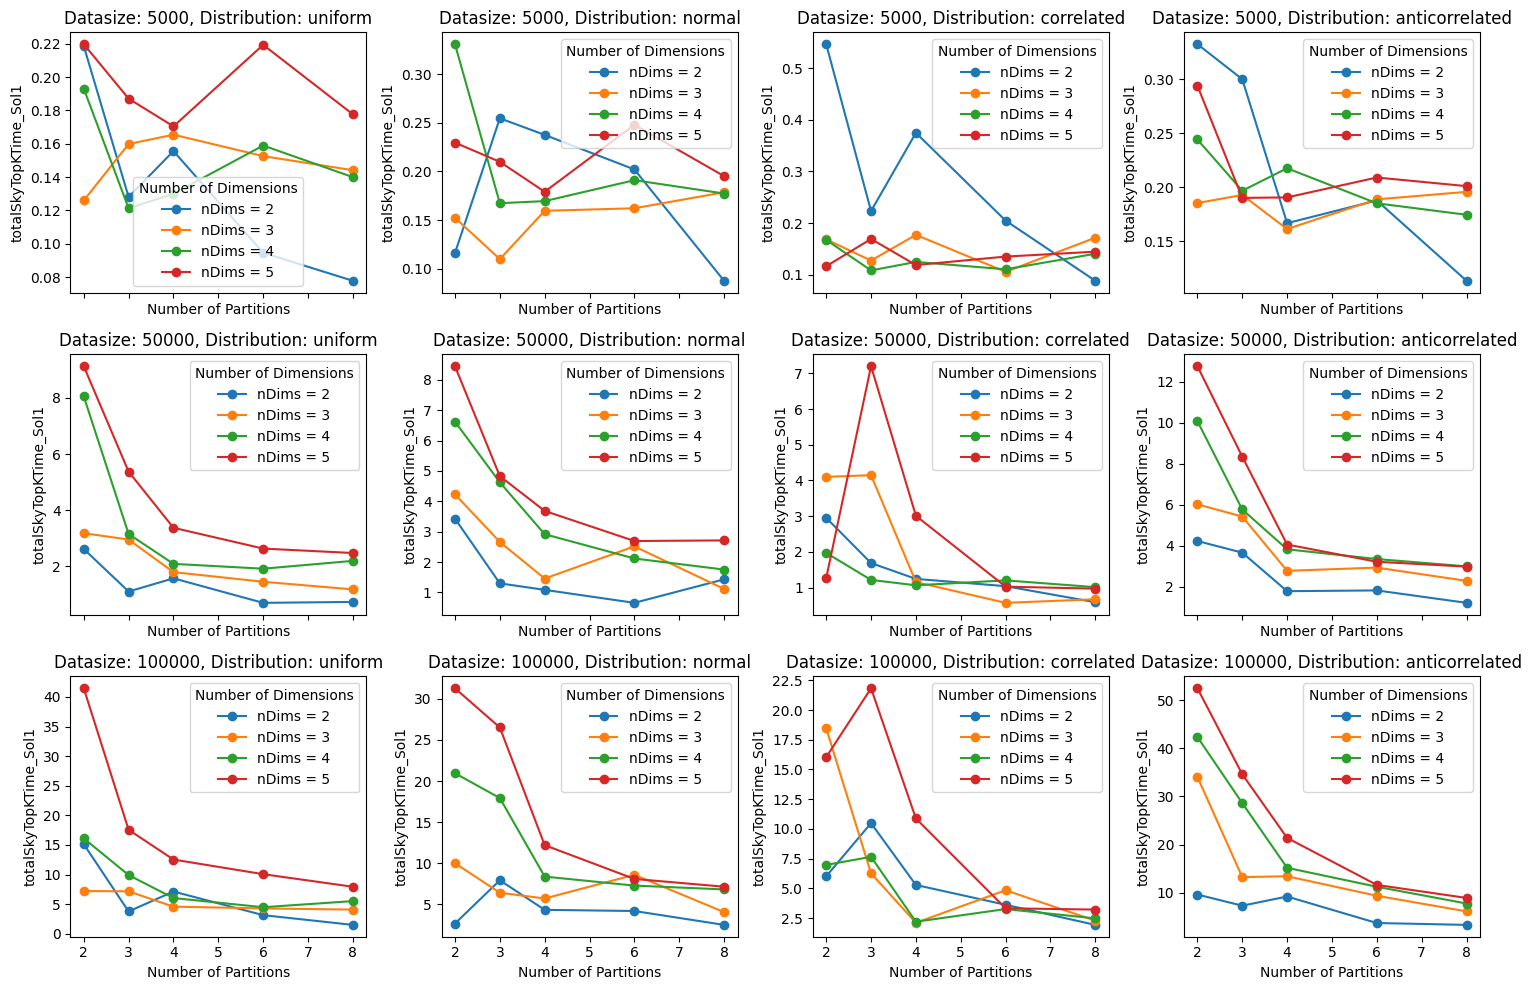

In [18]:
make_plots(SKY_TOPK_S1, False)

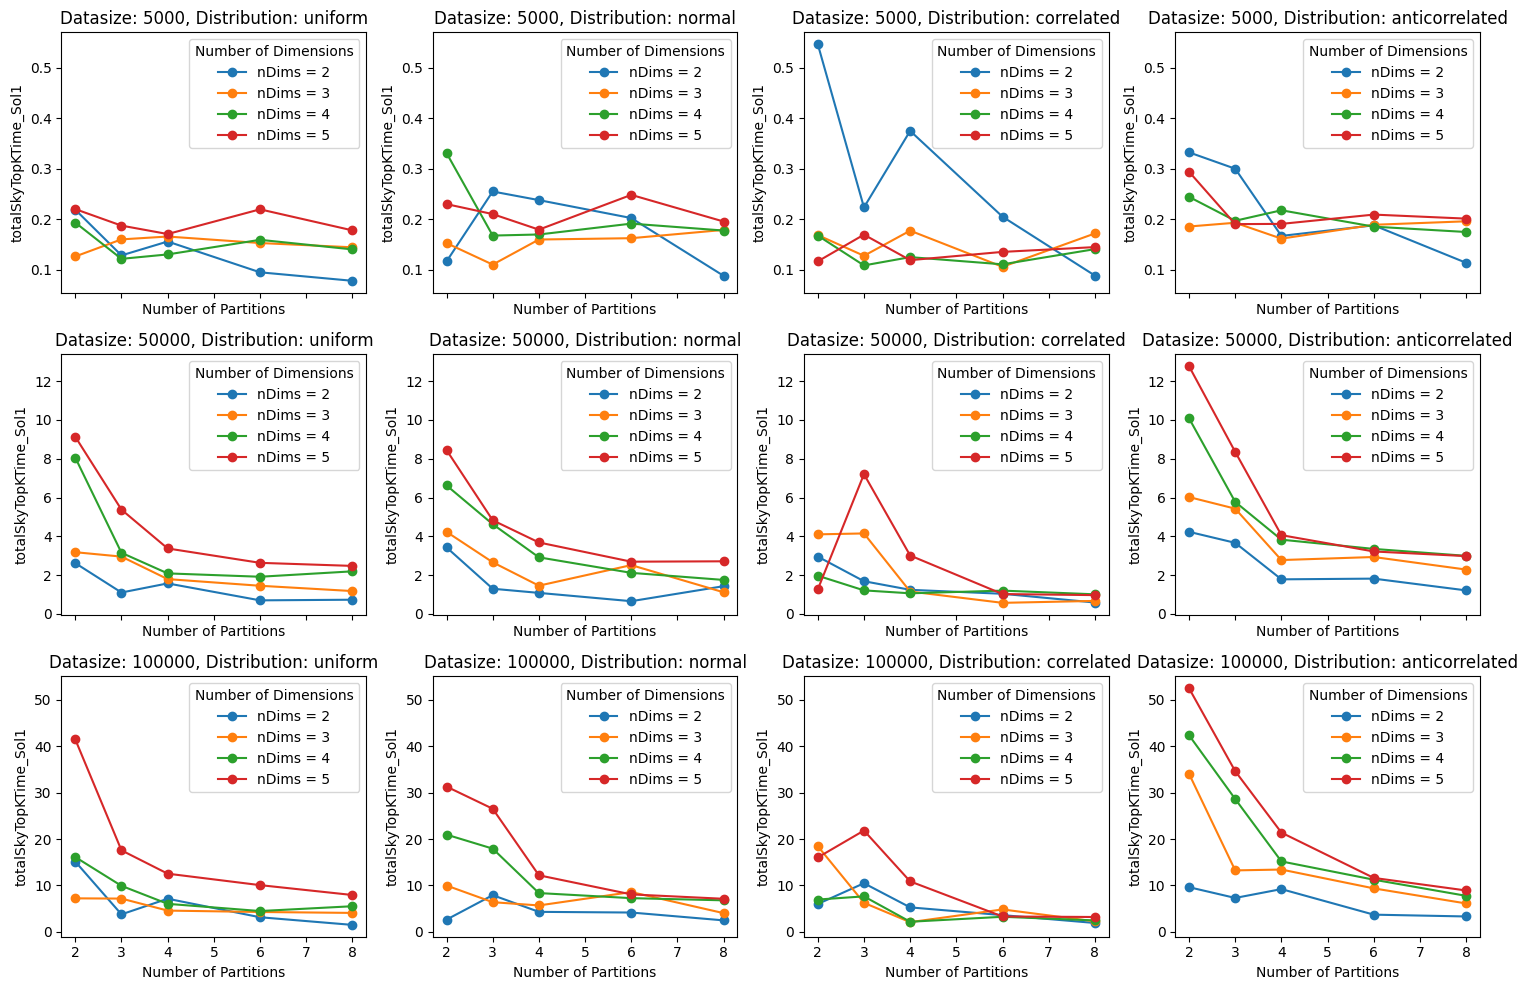

In [19]:
make_plots(SKY_TOPK_S1, True)

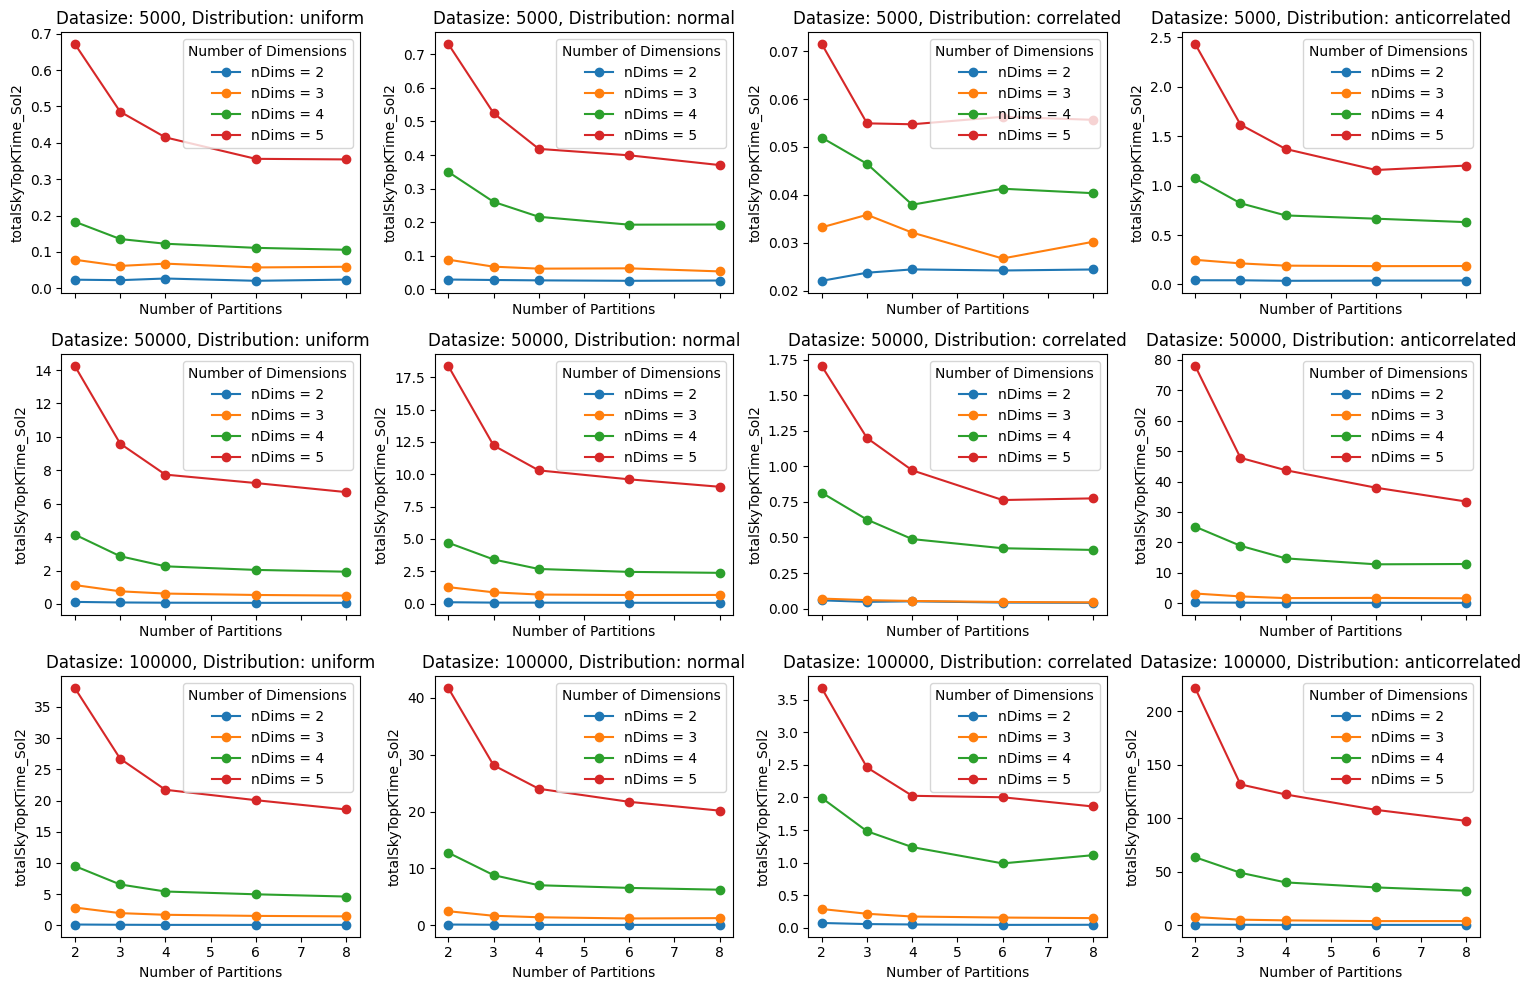

In [20]:
make_plots(SKY_TOPK_S2, False)

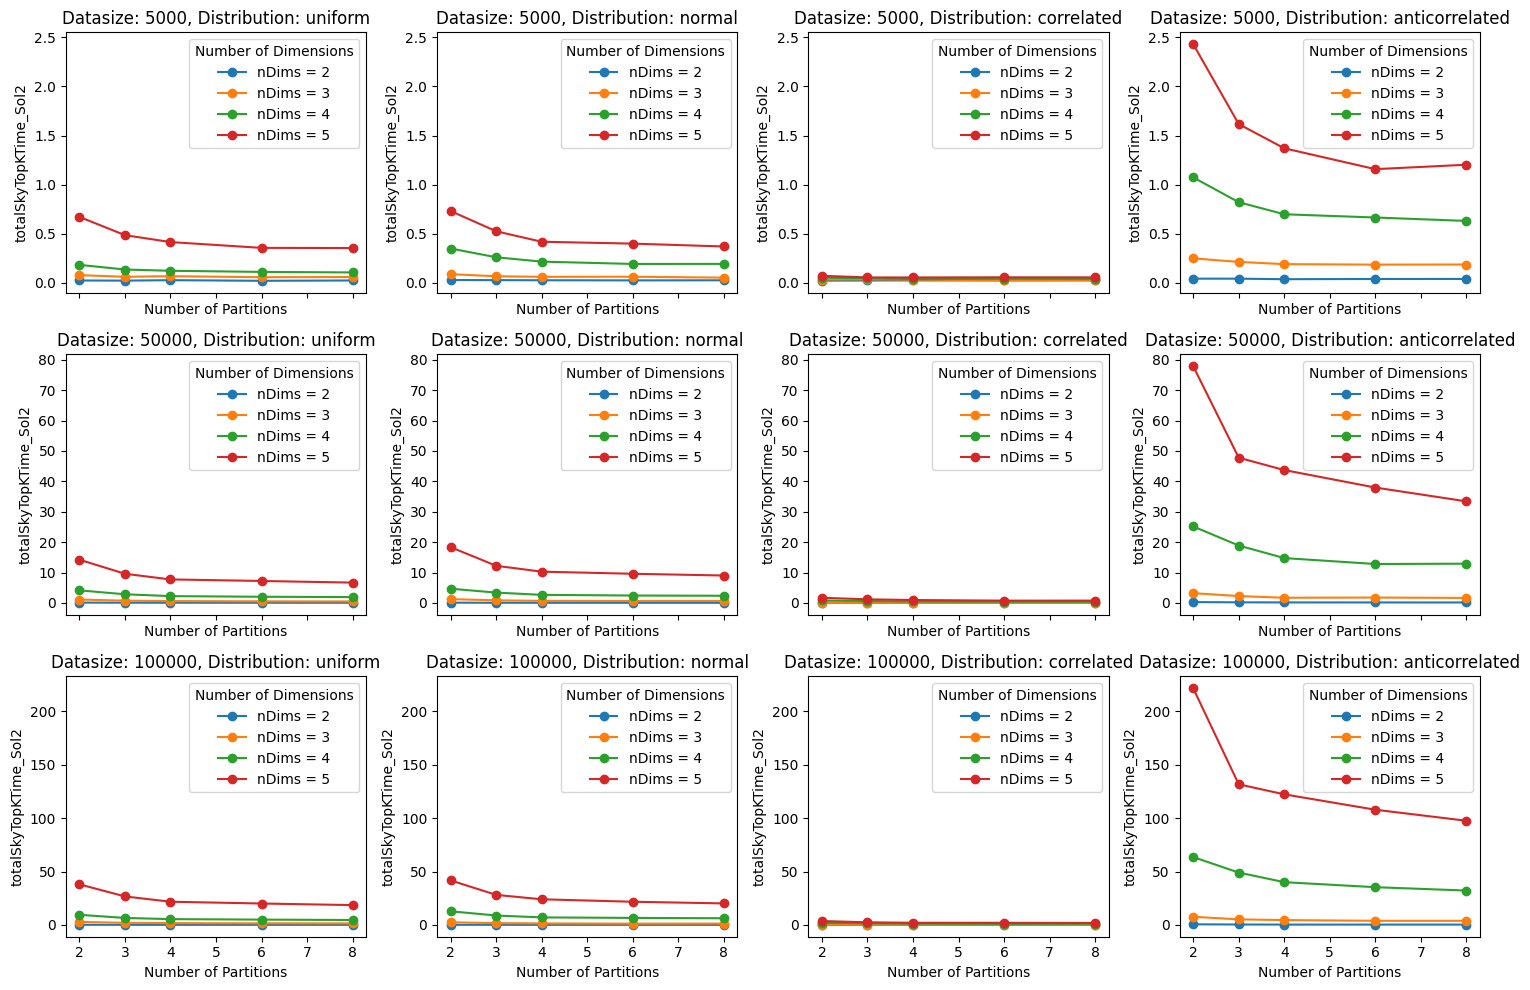

In [21]:
make_plots(SKY_TOPK_S2, True)

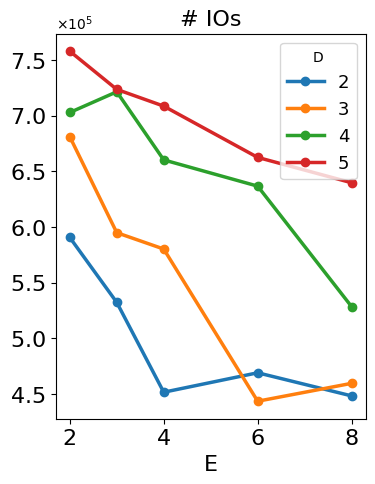

In [22]:
uni100IOS = df[(df[DISTRO]==UNIFORM) & (df[DATA_SIZE]==100000)]
uni100IOS = uni100IOS[[N_DIMS, N_PARTS, IOs, OVERFLOW]]

from matplotlib.ticker import ScalarFormatter

fig, ax = plt.subplots(figsize=(4, 5))

# Create a line plot for each unique nDims value
for nDims, group_df in uni100IOS.groupby(N_DIMS):
    ax.plot(group_df[N_PARTS], group_df[IOs], marker='o', label=f'{nDims}',linewidth=2.5)

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.yaxis.major.formatter.set_powerlimits((0, 0))


# Set labels and title
ax.set_xlabel('E', fontsize=16)
plt.title('# IOs', fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# Add a legend
ax.legend(title='D', fontsize=13)

plt.savefig('create tree uniform 100k IOS.png', dpi=330, bbox_inches='tight')

# Show the plot
plt.show()

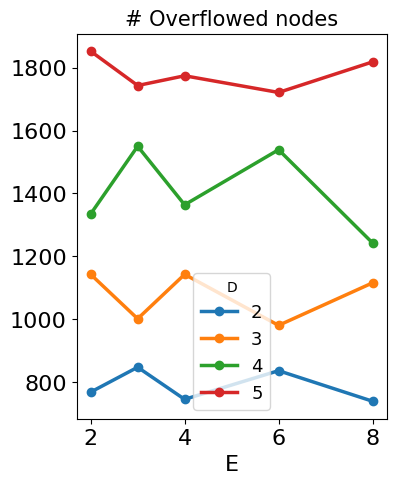

In [23]:
fig, ax = plt.subplots(figsize=(4, 5))

# Create a line plot for each unique nDims value
for nDims, group_df in uni100IOS.groupby(N_DIMS):
    ax.plot(group_df[N_PARTS], group_df[OVERFLOW], marker='o', label=f'{nDims}',linewidth=2.5)

# Set labels and title
ax.set_xlabel('E', fontsize=16)
plt.title('# Overflowed nodes', fontsize=15)

# Add a legend
ax.legend(title='D', fontsize=13)
ax.tick_params(axis='both', labelsize=16)

plt.savefig('create tree uniform 100k Overflow.png', dpi=330, bbox_inches='tight')

# Show the plot
plt.show()

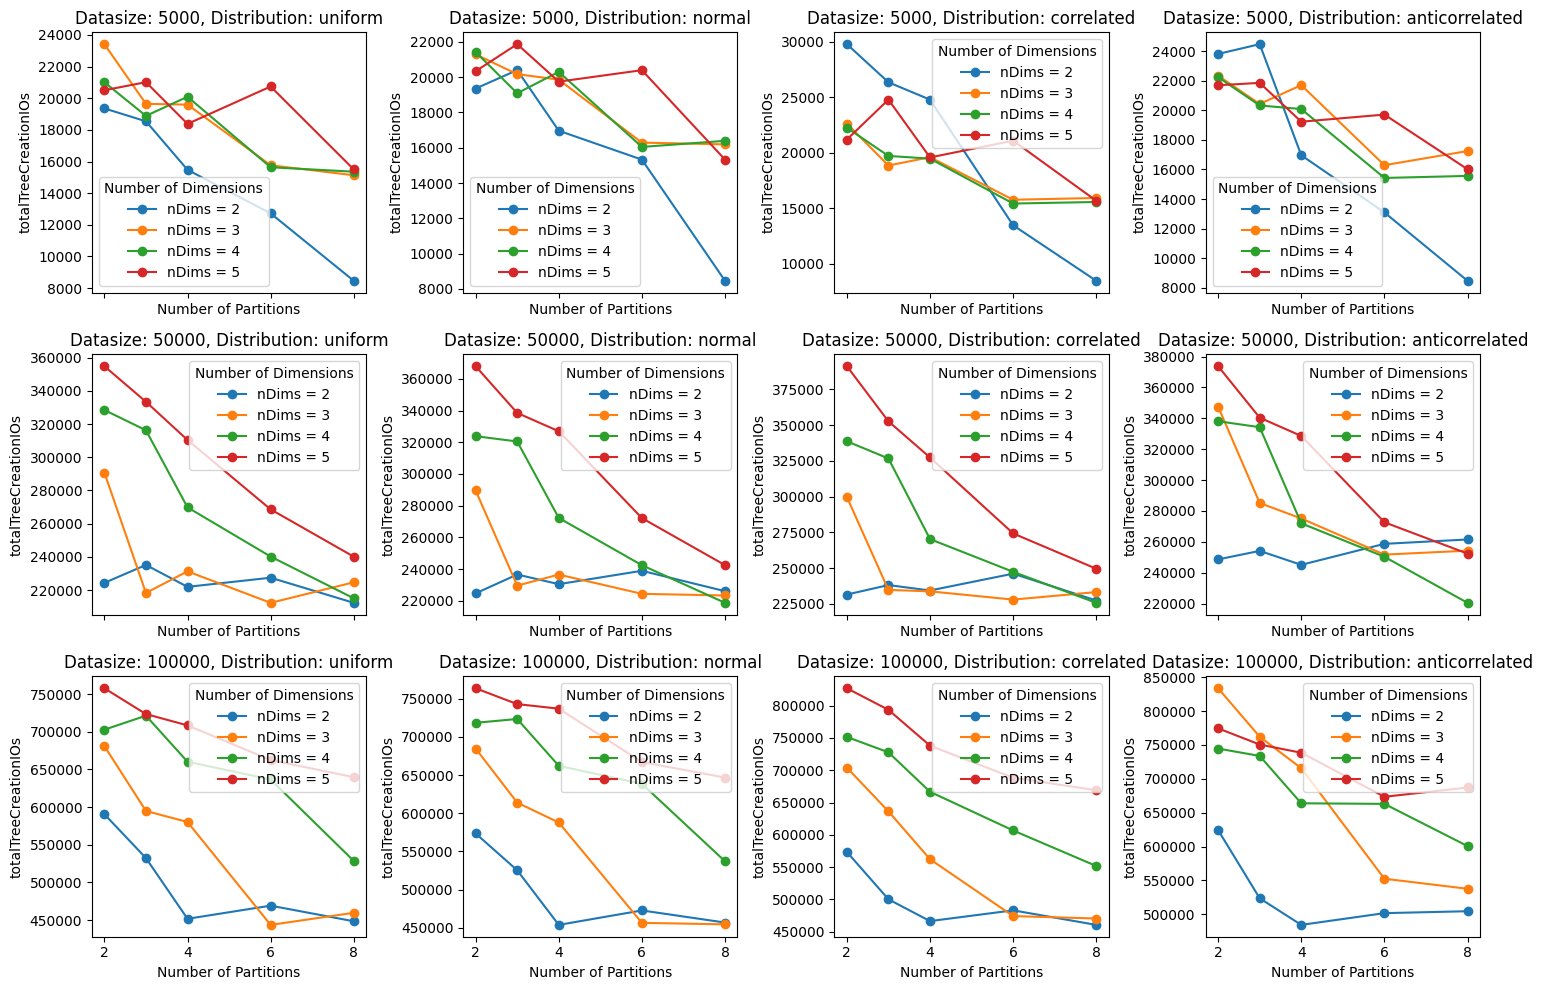

In [24]:
make_plots(IOs, False)

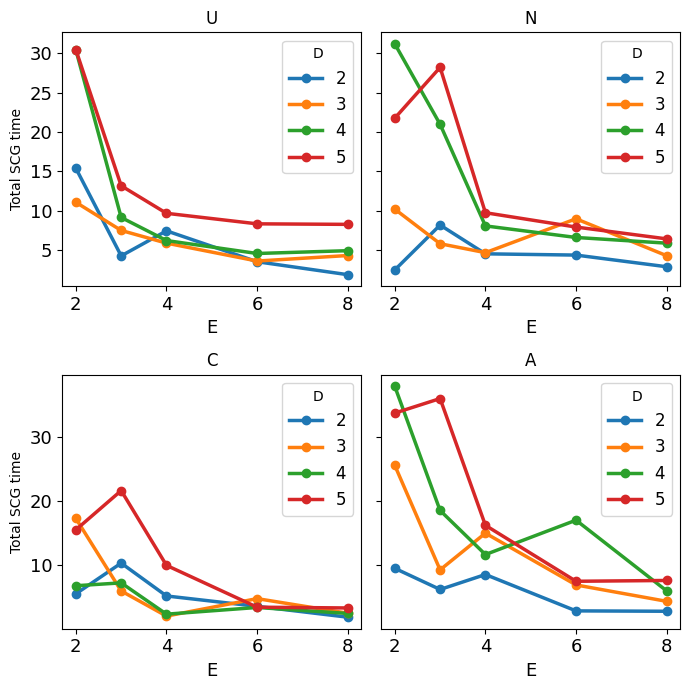

In [25]:
def make_plots_sharex_topk():
    timer_ = TOPK
    # Create a grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(7,7),  sharey='row')

    # Iterate over all combinations of distribution and dimensions
    for i, distribution in enumerate(DISTRIBUTIONS):
        results_group_ = getDatasetResults(distribution, 100000)
        df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

        # Plotting in the corresponding subplot
        for key, group in df_.groupby(N_DIMS):
            axs[i // 2, i % 2].plot(group[N_PARTS], group[timer_], marker='o', label=f'{key}',linewidth=2.5)

        axs[i // 2, i % 2].set_xlabel('E', fontsize=13)
        if(i%2 == 0):
            axs[i // 2, i % 2].set_ylabel("Total SCG time")
        axs[i // 2, i % 2].set_title(f'{distribution.upper()[0]}')
        axs[i // 2, i % 2].legend(title='D', fontsize=12)
        axs[i // 2, i % 2].tick_params(axis='both', labelsize=13)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.savefig('topk.png', dpi=330, bbox_inches='tight')
    # Show the plot
    plt.show()
make_plots_sharex_topk()

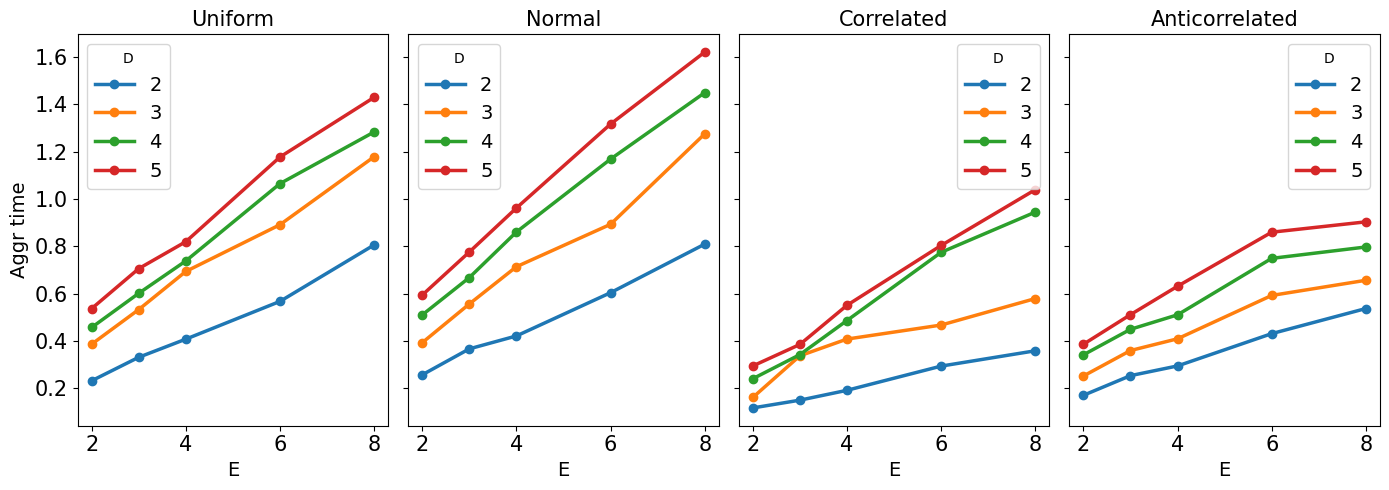

In [26]:
def make_plots_sharex_topk2():
    timer_ = "aggrTopKTime"
    # Create a grid of subplots with 1 row and 4 columns
    fig, axs = plt.subplots(1, 4, figsize=(14, 5), sharey=True)

    # Iterate over all combinations of distribution and dimensions
    for i, distribution in enumerate(DISTRIBUTIONS):
        results_group_ = getDatasetResults(distribution, 100000)
        df_ = results_group_[[N_DIMS, N_PARTS, timer_]]

        # Plotting in the corresponding subplot
        for key, group in df_.groupby(N_DIMS):
            axs[i].plot(group[N_PARTS], group[timer_], marker='o', label=f'{key}', linewidth=2.5)

        axs[i].set_xlabel('E', fontsize=14)
        axs[i].set_title(f'{distribution.upper()[0] + distribution[1:]}', fontsize=15)
        axs[i].legend(title='D', fontsize=14)
        axs[i].tick_params(axis='both', labelsize=15)

    # Set common y-axis label
    axs[0].set_ylabel("Aggr time", fontsize=14)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    plt.savefig('topk aggr.png', dpi=330, bbox_inches='tight')
    # Show the plot
    plt.show()

make_plots_sharex_topk2()


In [28]:

def createPivotTable(timer_, round_=True, isInt=False):

    df_copy = df.copy()
    
    df_copy = df_copy[df_copy[N_DIMS].isin([2, 4])]
    df_copy = df_copy[df_copy[N_PARTS].isin([2, 4, 8])]
    
    if round_:
        df_copy[timer_] = df_copy[timer_].round(2)
    if isInt:
        df_copy[timer_] = df_copy[timer_].astype(int)
        
    pivot_df = df_copy.pivot_table(index=[DISTRO, N_PARTS], columns=[DATA_SIZE, N_DIMS], values=timer_)

    f = '{:.2f}' if not isInt else '{:d}'
    pivot_df = pivot_df.applymap(lambda x: f.format(x) if pd.notna(x) else '')

    pivot_df.to_excel("output.xlsx", engine="openpyxl")
    return pivot_df


In [40]:
createPivotTable(CREATE_TREE)

dataSize                   5000         50000          100000        
nDims                           2     4      2      4       2       4
distribution   nPartitions                                           
uniform        2             1.32  1.37  37.45  39.64  116.12  172.45
               4             0.70  0.88   8.71  11.68   37.07   36.07
               8             0.36  0.65   5.06   6.65   13.68   16.83
normal         2             1.22  1.51  34.31  39.12  111.15  158.83
               4             0.83  0.92   8.31  12.85   32.31   38.16
               8             0.43  0.68   5.76   6.52   13.69   23.48
correlated     2             2.01  1.51  38.02  40.50  112.22  179.14
               4             1.19  0.88   9.15  12.20   53.16   35.93
               8             0.40  0.67   5.01   6.32   12.54   19.40
anticorrelated 2             1.54  1.44  41.53  40.19  118.95  172.92
               4             0.75  0.93  10.37  10.97   44.63   36.44
               8             0.48  0.67   5.99   6.44   16.64   18.70

In [30]:
createPivotTable(IOs, round_=False, isInt=True)

dataSize                   5000           50000           100000        
nDims                           2      4       2       4       2       4
distribution   nPartitions                                              
uniform        2            19354  21009  224386  328472  590655  702877
               4            15476  20091  221975  269847  451724  660308
               8             8464  15357  212353  215064  448426  528555
normal         2            19354  21423  224758  323821  573566  718309
               4            16964  20298  230555  272308  453956  662053
               8             8464  16392  226123  218778  456997  537160
correlated     2            29779  22251  231442  338643  573426  751599
               4            24782  19470  234269  270230  466247  666628
               8             8464  15564  227257  225639  460378  551607
anticorrelated 2            23821  22251  248587  338127  624321  744624
               4            16964  20091  245057  271960  484484  663879
               8             8464  15564  261493  220428  504646  600750

In [31]:
createPivotTable(OVERFLOW, round_=False, isInt=True)

dataSize                   5000       50000       100000      
nDims                           2   4      2    4      2     4
distribution   nPartitions                                    
uniform        2               30  63    373  676    769  1335
               4               22  61    362  657    746  1364
               8                8  43    339  600    740  1243
normal         2               30  65    374  647    720  1375
               4               26  62    393  664    752  1357
               8                8  48    378  614    768  1296
correlated     2               61  69    388  709    766  1487
               4               49  58    401  660    790  1382
               8                8  44    387  657    788  1379
anticorrelated 2               43  69    445  707    853  1474
               4               26  61    430  670    842  1369
               8                8  44    483  620    907  1461

In [ ]:
total = createPivotTable(TOPK)
total

In [ ]:
aggr = createPivotTable("aggrTopKTime")
aggr

In [ ]:
total = total.apply(pd.to_numeric, errors='coerce').fillna(0)
aggr = aggr.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate the percentage for each corresponding pair of cells
portion = (aggr / total) * 100

portion